In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from IPython.display import FileLink

In [66]:
def make_discription(data):
    print(data.info())
    print(data.describe())
    print(data.head())

In [67]:
data = pd.read_csv('Revpar.csv', delimiter=';')
make_discription(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Дата        366 non-null    object
 1   Отель       366 non-null    object
 2   Конкуренты  366 non-null    object
dtypes: object(3)
memory usage: 8.7+ KB
None
              Дата  Отель Конкуренты
count          366    366        366
unique         366    349        344
top     01.05.2023  4 065      1 982
freq             1      3          2
         Дата  Отель Конкуренты
0  01.05.2023  2 262        600
1  02.05.2023  2 952        958
2  03.05.2023  3 560      1 034
3  04.05.2023  3 272      1 171
4  05.05.2023  2 991      1 039


In [68]:
data['Отель'] = data['Отель'].str.replace(' ', '')
data['Отель'] = pd.to_numeric(data['Отель'], errors='coerce')
data = data.dropna(subset=['Отель'])
data['Отель'] = data['Отель'].astype(int)
data['Конкуренты'] = data['Конкуренты'].str.replace(' ', '')
data['Конкуренты'] = pd.to_numeric(data['Конкуренты'], errors='coerce')
data = data.dropna(subset=['Конкуренты'])
data['Конкуренты'] = data['Конкуренты'].astype(int)
data['Дата'] = pd.to_datetime(data['Дата'], format='%d.%m.%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        366 non-null    datetime64[ns]
 1   Отель       366 non-null    int32         
 2   Конкуренты  366 non-null    int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 8.6 KB


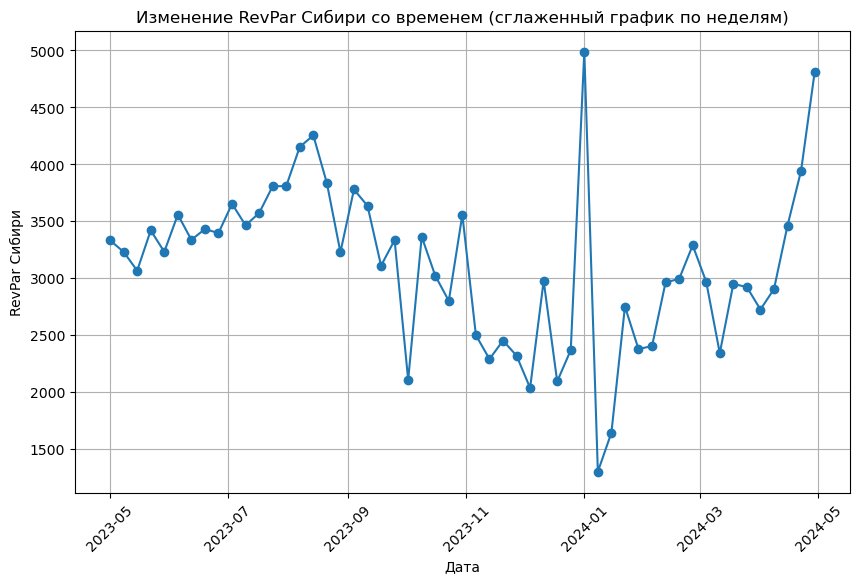

In [69]:
data_smoothed_sib = data.resample('7D', on='Дата').mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data_smoothed_sib['Дата'], data_smoothed_sib['Отель'], marker='o')

plt.xlabel('Дата')
plt.ylabel('RevPar Сибири')
plt.title('Изменение RevPar Сибири со временем (сглаженный график по неделям)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

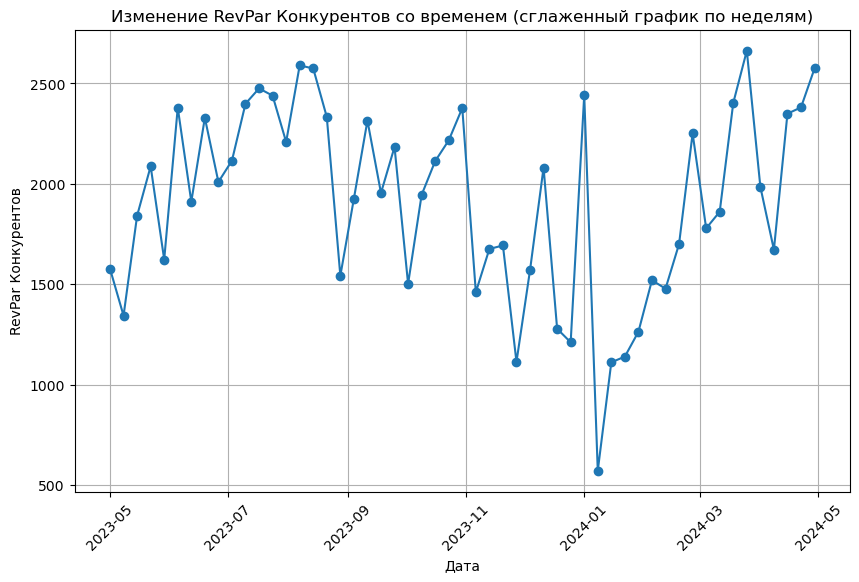

In [70]:
data_smoothed_kon = data.resample('7D', on='Дата').mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data_smoothed_kon['Дата'], data_smoothed_kon['Конкуренты'], marker='o')

plt.xlabel('Дата')
plt.ylabel('RevPar Конкурентов')
plt.title('Изменение RevPar Конкурентов со временем (сглаженный график по неделям)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

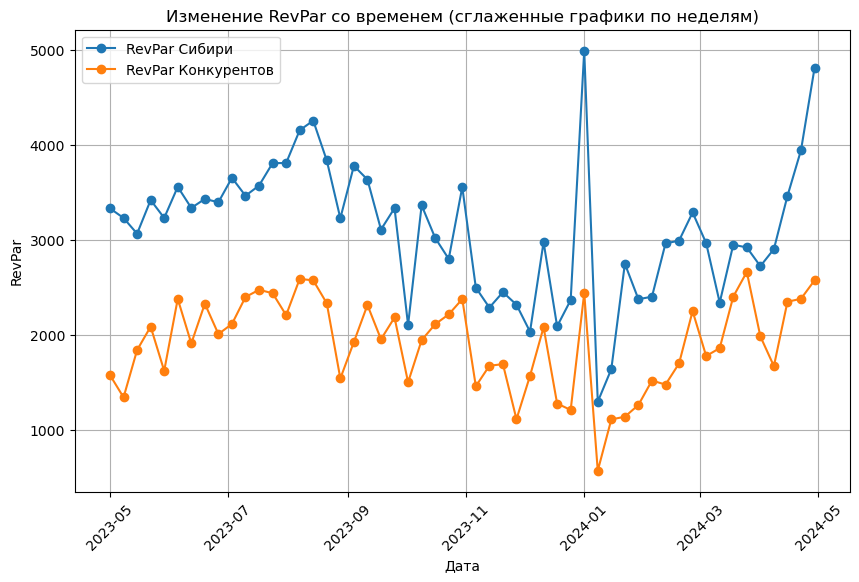

In [71]:
data_smoothed_sib = data.resample('7D', on='Дата').mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data_smoothed_sib['Дата'], data_smoothed_sib['Отель'], marker='o', label='RevPar Сибири')

data_smoothed_kon = data.resample('7D', on='Дата').mean().reset_index()

plt.plot(data_smoothed_kon['Дата'], data_smoothed_kon['Конкуренты'], marker='o', label='RevPar Конкурентов')

plt.xlabel('Дата')
plt.ylabel('RevPar')
plt.title('Изменение RevPar со временем (сглаженные графики по неделям)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

Переведем данные к интервалу от 0 до 1

In [72]:
scaler = MinMaxScaler()
data['Отель_normalized'] =  scaler.fit_transform(data[['Отель']])
data['Конкуренты_normalized'] =  scaler.fit_transform(data[['Конкуренты']])
data.head()

,Дата,Отель,Конкуренты,Отель_normalized,Конкуренты_normalized
0,2023-05-01,2262,600,0.295052,0.045310
1,2023-05-02,2952,958,0.408093,0.159541
2,2023-05-03,3560,1034,0.507700,0.183791
3,2023-05-04,3272,1171,0.460518,0.227505
4,2023-05-05,2991,1039,0.414482,0.185386


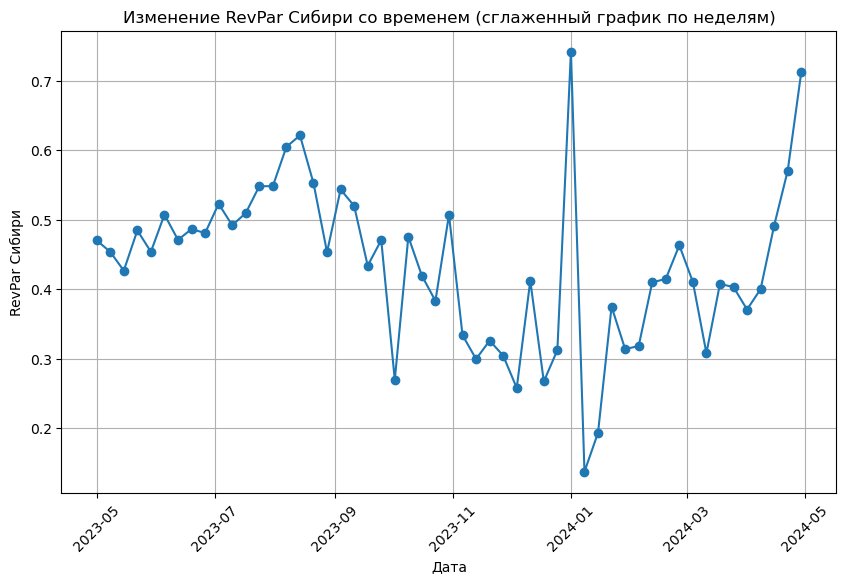

In [73]:
data_smoothed_sib_norm = data.resample('7D', on='Дата').mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data_smoothed_sib_norm['Дата'], data_smoothed_sib_norm['Отель_normalized'], marker='o')

plt.xlabel('Дата')
plt.ylabel('RevPar Сибири')
plt.title('Изменение RevPar Сибири со временем (сглаженный график по неделям)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

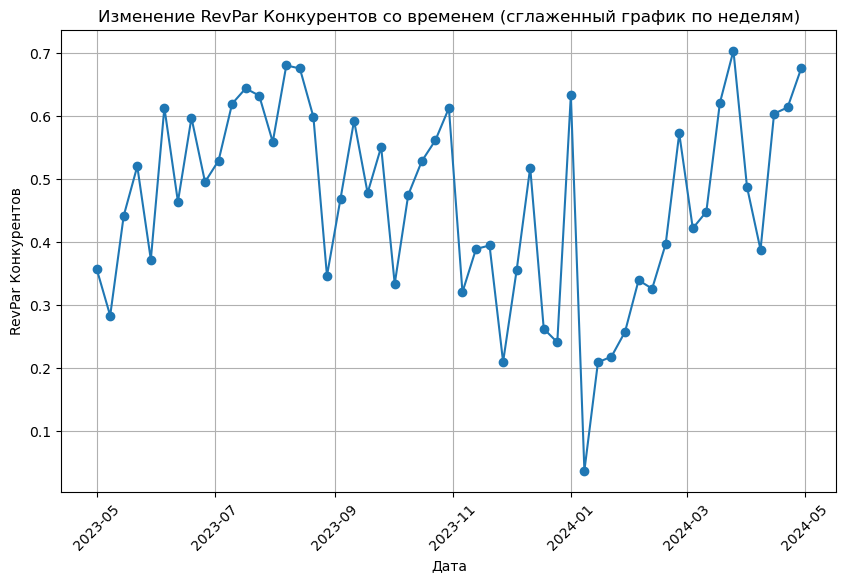

In [74]:
data_smoothed_kon_norm = data.resample('7D', on='Дата').mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data_smoothed_kon_norm['Дата'], data_smoothed_kon_norm['Конкуренты_normalized'], marker='o')

plt.xlabel('Дата')
plt.ylabel('RevPar Конкурентов')
plt.title('Изменение RevPar Конкурентов со временем (сглаженный график по неделям)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

Совместим эти два графика

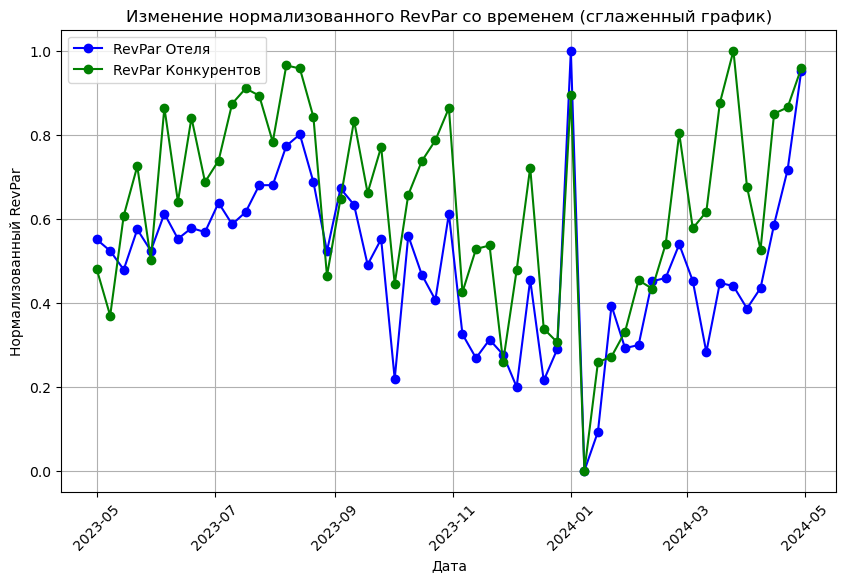

In [75]:
data_smoothed = data.resample('7D', on='Дата').mean().reset_index()
scaler = MinMaxScaler()
data_smoothed['Отель_normalized'] = scaler.fit_transform(data_smoothed[['Отель']])
data_smoothed['Конкуренты_normalized'] = scaler.fit_transform(data_smoothed[['Конкуренты']])

plt.figure(figsize=(10, 6))

plt.plot(data_smoothed['Дата'], data_smoothed['Отель_normalized'], marker='o', color='b', label='RevPar Отеля')
plt.plot(data_smoothed['Дата'], data_smoothed['Конкуренты_normalized'], marker='o', color='g', label='RevPar Конкурентов')

plt.xlabel('Дата')
plt.ylabel('Нормализованный RevPar')
plt.title('Изменение нормализованного RevPar со временем (сглаженный график)')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.show()

 Попробуем привести данные к нормальному распределению с нулевым средним и единичной дисперсией

Zi = (Xi - μ) / σ
 


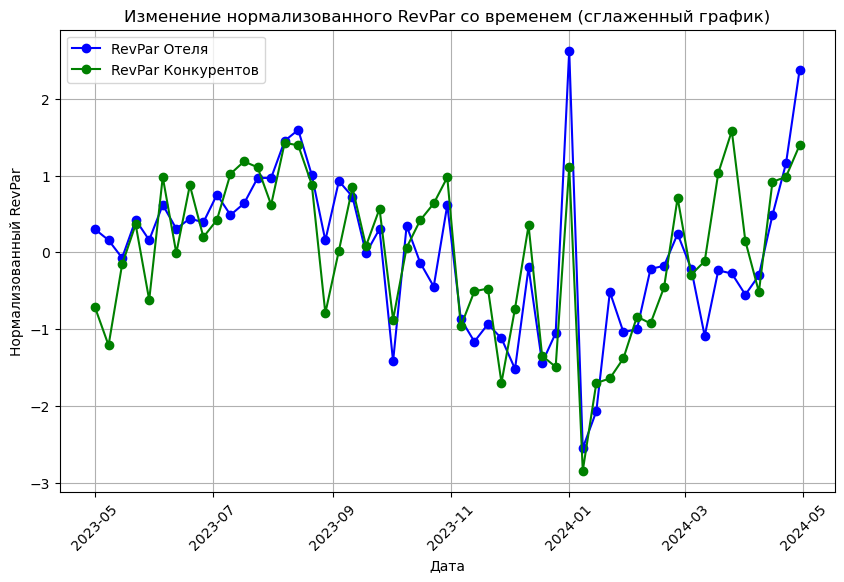

In [76]:
data_smoothed_st = data.resample('7D', on='Дата').mean().reset_index()
scaler = StandardScaler()
data_smoothed_st['Отель_normalized'] = scaler.fit_transform(data_smoothed_st[['Отель']])
data_smoothed_st['Конкуренты_normalized'] = scaler.fit_transform(data_smoothed_st[['Конкуренты']])

plt.figure(figsize=(10, 6))

plt.plot(data_smoothed_st['Дата'], data_smoothed_st['Отель_normalized'], marker='o', color='b', label='RevPar Отеля')
plt.plot(data_smoothed_st['Дата'], data_smoothed_st['Конкуренты_normalized'], marker='o', color='g', label='RevPar Конкурентов')

plt.xlabel('Дата')
plt.ylabel('Нормализованный RevPar')
plt.title('Изменение нормализованного RevPar со временем (сглаженный график)')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [77]:
data_smoothed_st.head()

,Дата,Отель,Конкуренты,Отель_normalized,Конкуренты_normalized
0,2023-05-01,3331.285714,1577.714286,0.300362,-0.716323
1,2023-05-08,3230.000000,1344.285714,0.158326,-1.210408
2,2023-05-15,3065.428571,1841.571429,-0.072456,-0.157832
3,2023-05-22,3418.714286,2087.571429,0.422965,0.362861
4,2023-05-29,3230.857143,1623.285714,0.159528,-0.619865


In [107]:
def assign_cluster(row):
    if row['Конкуренты_normalized_st'] > (row['Отель_normalized_st'] + 0.5):
        return 0
    elif (row['Конкуренты_normalized_st'] < (row['Отель_normalized_st'] + 0.5)) and ((row['Конкуренты_normalized_st'] + 0.5) > row['Отель_normalized_st']):
        return 1
    elif row['Отель_normalized_st'] > (row['Конкуренты_normalized_st'] + 0.5):
        return 2

In [108]:
scaler = StandardScaler()
data['Отель_normalized_st'] = scaler.fit_transform(data[['Отель']])
data['Конкуренты_normalized_st'] = scaler.fit_transform(data[['Конкуренты']])

In [109]:
data['кластер'] = data.apply(assign_cluster, axis=1)

In [110]:
data.head()

,Дата,Отель,Конкуренты,Отель_normalized,Конкуренты_normalized,Отель_normalized_st,Конкуренты_normalized_st,кластер
0,2023-05-01,2262,600,0.295052,0.045310,-0.808571,-1.829608,2
1,2023-05-02,2952,958,0.408093,0.159541,-0.137999,-1.328516,2
2,2023-05-03,3560,1034,0.507700,0.183791,0.452882,-1.222139,2
3,2023-05-04,3272,1171,0.460518,0.227505,0.172991,-1.030380,2
4,2023-05-05,2991,1039,0.414482,0.185386,-0.100097,-1.215140,2


In [111]:
data['кластер'].value_counts()

кластер
1    167
0    106
2     93
Name: count, dtype: int64

In [114]:
cluster_knn = pd.read_csv('cluster_labels.csv', delimiter=',')
make_discription(cluster_knn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Дата    366 non-null    object
 1   label   366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None
            label
count  366.000000
mean     0.923497
std      0.705862
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      2.000000
         Дата  label
0  2023-05-01      2
1  2023-05-02      2
2  2023-05-03      2
3  2023-05-04      2
4  2023-05-05      2


In [116]:
merged_data = data.merge(cluster_knn, left_index=True, right_index=True)
merged_data.head()

,Дата_x,Отель,Конкуренты,Отель_normalized,Конкуренты_normalized,Отель_normalized_st,Конкуренты_normalized_st,кластер,Дата_y,label
0,2023-05-01,2262,600,0.295052,0.045310,-0.808571,-1.829608,2,2023-05-01,2
1,2023-05-02,2952,958,0.408093,0.159541,-0.137999,-1.328516,2,2023-05-02,2
2,2023-05-03,3560,1034,0.507700,0.183791,0.452882,-1.222139,2,2023-05-03,2
3,2023-05-04,3272,1171,0.460518,0.227505,0.172991,-1.030380,2,2023-05-04,2
4,2023-05-05,2991,1039,0.414482,0.185386,-0.100097,-1.215140,2,2023-05-05,2


In [123]:
conditions = [
    np.abs(merged_data['кластер'] - merged_data['label']) == 2,
    np.abs(merged_data['кластер'] - merged_data['label']) == 1,
    np.abs(merged_data['кластер'] - merged_data['label']) == 0
]

values = ['большая ошибка', 'ошибка', 'сходство']

merged_data['сравнение'] = np.select(conditions, values, default='')

merged_data.head()

,Дата_x,Отель,Конкуренты,Отель_normalized,Конкуренты_normalized,Отель_normalized_st,Конкуренты_normalized_st,кластер,Дата_y,label,сравнение
0,2023-05-01,2262,600,0.295052,0.045310,-0.808571,-1.829608,2,2023-05-01,2,сходство
1,2023-05-02,2952,958,0.408093,0.159541,-0.137999,-1.328516,2,2023-05-02,2,сходство
2,2023-05-03,3560,1034,0.507700,0.183791,0.452882,-1.222139,2,2023-05-03,2,сходство
3,2023-05-04,3272,1171,0.460518,0.227505,0.172991,-1.030380,2,2023-05-04,2,сходство
4,2023-05-05,2991,1039,0.414482,0.185386,-0.100097,-1.215140,2,2023-05-05,2,сходство


In [124]:
merged_data['сравнение'].value_counts()

сравнение
сходство    229
ошибка      137
Name: count, dtype: int64

Больших ошибок нет

In [127]:
file_path = "merged_data.csv"
merged_data_subset = merged_data[['Дата_x', 'кластер']]

merged_data_subset.to_csv(file_path, index=False)

FileLink(file_path)

C:\Users\petre\merged_data.csv